# Results analysis

#### dataset Loading and options 

In [80]:
from datasets import Dataset,load_dataset
import pandas as pd
import seaborn as sb

dataset_split_name ="simpleLLM_benchmark_llama3.18binstant_pk_1_t_0.7" 
#dataset_split_name ="simpleLLM_benchmark_llama3.370bversatile_pk_1_t_0.7"
#dataset_split_name ="simpleLLM_benchmark_llama370b8192_pk_1_t_0.7"
#dataset_split_name ="simpleLLM_benchmark_mixtral8x7b32768_pk_1_t_0.7" 
#dataset_split_name = "simpleLLM_benchmark_deepseekr1distillllama70b_pk_1_t_0.7"
dataset_split = [dataset_split_name][0]

dataset = load_dataset("CharlyR/varbench-evaluation", dataset_split, split="tikz")
import os

result_path = os.path.join("results",dataset_split_name)
not os.path.exists("results/"+dataset_split_name) and os.mkdir("results/"+dataset_split_name)


Generating tikz split: 100%|██████████| 50/50 [00:00<00:00, 6129.87 examples/s]


In [81]:
dataset

Dataset({
    features: ['id', 'code', 'instruction', 'result_description', 'difficulty', 'patch', 'code_solution', 'image_solution', 'image_input', 'original_predictions', 'predictions', 'image_result_indexes', 'images_result', 'parsing_score', 'compiling_score', 'predictions_patches', 'MSSSIMMetric', 'ClipImageMetric', 'PSNRMetric', 'ChrfPatchMetric', 'TERMetric', 'BleuPatchMetric', 'LineMetric', 'MSEMetric', 'PatchMetric', 'ClipTextMetric', 'FeatureMatchMetric', 'LPIPSMetric', 'ChrfMetric', 'BleuMetric', 'TERPatchMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric'],
    num_rows: 50
})

## Best prediction computation

---
Best prediction is computed but not used for now, passk list is flattened later and metrics computed on all of them

In [82]:
from results_utils import MetricPolicy
import pandas as pd

computed_metrics_names = [
    metric_name
    for metric_name in dataset.column_names
    if metric_name.endswith("Metric")
]


# each metric is computed on list of predictions of length pass@k, and yields a list of list of result of the same length.
# from that list[list[float]](the results), we get the best result according to a certain policy(here the arithmetic mean)
subset = dataset.map(
    MetricPolicy.compute_best_prediction,
    fn_kwargs={"computed_metrics_names": computed_metrics_names},
)

scores = {
    metric_name: sum(subset[f"best_{metric_name}"]) / len(subset)
    for metric_name in computed_metrics_names
}
scores["var_score"] = sum(subset["var_score"]) / len(subset)
print(scores)#average of each best predicted score => NOTE: For all the instances where nothing compile, every best score is put to zero, reducing the other scores by a lot
result_df:pd.DataFrame = subset.to_pandas()

Map: 100%|██████████| 50/50 [00:00<00:00, 983.13 examples/s]

{'MSSSIMMetric': 58.800201988220216, 'ClipImageMetric': 71.29039642333984, 'PSNRMetric': 32.336941146850585, 'ChrfPatchMetric': 21.45930904388428, 'TERMetric': 70.0941244506836, 'BleuPatchMetric': 8.319216872751714, 'LineMetric': 15.0, 'MSEMetric': 73.67717254638671, 'PatchMetric': 2.0, 'ClipTextMetric': 18.848866786956787, 'FeatureMatchMetric': 40.34109434604645, 'LPIPSMetric': 61.887325286865234, 'ChrfMetric': 74.20624267578125, 'BleuMetric': 70.90939437866211, 'TERPatchMetric': 41.95579917907715, 'CrystalBleuPatchMetric': 7.890811692774296, 'CrystalBleuMetric': 69.73455543518067, 'var_score': 43.45596777961535}


In [83]:
result_df

,id,code,instruction,result_description,difficulty,patch,code_solution,image_solution,image_input,original_predictions,...,best_MSEMetric,best_PatchMetric,best_ClipTextMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_ChrfMetric,best_BleuMetric,best_TERPatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric
0,donkey_higher_mane,"\documentclass[tikz,border=5]{standalone}\n\us...",Make the mane of the donkey go upward a little...,A donkey with a high mane over its head,hard,"@@ -61,2 +61,2 @@\n- to [bend left] ++( 16, ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\n\documentclass[tikz,border=5]{standalone...",...,84.581779,0.0,15.663202,0.000000,22.776806,98.469879,95.110420,51.079136,0.321193,94.332748
1,chimpanzee_squint_crosseyes,"\documentclass[tikz,border=5]{standalone}\n\us...","Make the eyes of the chimpanzee crossed, by ma...",A crossed-eyes chimpanzee,medium,"@@ -29,2 +29,4 @@\n-\foreach \i in {-1,1}- \f...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\n\documentclass[tikz,border=5]{standalone...",...,99.670143,0.0,25.995829,55.405407,91.912727,87.774857,62.568230,50.000000,1.962339,58.945217
2,bee_red_stripes,"\documentclass[tikz,border=5]{standalone}\n\us...",Change the color of the stripes to red,A bee with red stripes,easy,"@@ -25,2 +25,2 @@\n- on left= {colors alias={...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\n\documentclass[tikz,border=5]{standalone...",...,100.000000,100.0,27.442711,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3,shark_no_teeth,"\documentclass[tikz,border=5]{standalone}\n\us...",Remove the teeth of the shark,A shark with no teeth,easy,"@@ -7,6 +6,0 @@\n-\fill [BlueGrey200]- (2,16....","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\documentclass[tikz,border=5]{standalone}\...",...,99.995308,0.0,25.189659,97.826088,99.518967,97.166977,84.566658,50.000000,0.000000,84.264595
4,shark_other_set_pectoral_fin,"\documentclass[tikz,border=5]{standalone}\n\us...","Add another set of pectoral fin to the shark, ...",A shark with two sets of pectoral fins,hard,"@@ -16,0 +17,6 @@\n+\fill [BlueGrey700] (11,10...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\n\documentclass[tikz,border=5]{standalone...",...,99.885391,0.0,26.796242,67.741936,95.842644,90.184837,86.171143,51.327435,0.887146,85.489922
5,dog_red_eyes,"\documentclass[tikz,border=5]{standalone}\n\us...",Change the colors of the dog's eyes to red,A dog with red eyes,easy,"@@ -51 +51 @@\n- \fill [BlueGrey900] (56, 0) ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\n\documentclass[tikz,border=5]{standalone...",...,99.906342,0.0,25.263947,93.548386,96.431313,98.945435,95.331955,60.714287,6.224824,93.748482
6,monkey_sad,"\documentclass[tikz,border=5]{standalone}\n\us...","Make the monkey sad, by turning the shape of i...","A sad monkey, with its a downturned mouth",easy,"@@ -48,2 +48 @@\n- (-96,-72) arc (180:360:96 ...","\documentclass[tikz,border=5]{standalone}\n\us...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...,"[```\n\documentclass[tikz,border=5]{standalone...",...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,squid_bigger_eyes,"\documentclass[tikz,border=5]{standalone}\n\us...",Make the eyes of the squid bigger,A squid with big roud eyes,medi

## Pre-Filtering

In [84]:
# filtering by having a result
filtered_df = result_df[result_df["index_best_prediction"] != -1]

# ordering by text metrics
text_metrics = [
    metric_name
    for metric_name in computed_metrics_names
    if any((substring in metric_name) for substring in ["TER", "Line", "Bleu", "Chrf","Patch"])
]
other_metrics = list(set(computed_metrics_names) - set(text_metrics))
ordered_metrics = ["best_"+metric for metric in (text_metrics + other_metrics)]
print(text_metrics + other_metrics)

filtered_df = filtered_df[ordered_metrics + ["id", "difficulty"]]
filtered_df

['ChrfPatchMetric', 'TERMetric', 'BleuPatchMetric', 'LineMetric', 'PatchMetric', 'ChrfMetric', 'BleuMetric', 'TERPatchMetric', 'CrystalBleuPatchMetric', 'CrystalBleuMetric', 'ClipTextMetric', 'PSNRMetric', 'FeatureMatchMetric', 'LPIPSMetric', 'MSSSIMMetric', 'MSEMetric', 'ClipImageMetric']


,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_ChrfMetric,best_BleuMetric,best_TERPatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_ClipTextMetric,best_PSNRMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_MSSSIMMetric,best_MSEMetric,best_ClipImageMetric,id,difficulty
0,10.342218,97.230766,0.257372,50.0,0.0,98.469879,95.110420,51.079136,0.321193,94.332748,15.663202,32.717537,0.000000,22.776806,39.564514,84.581779,68.981384,donkey_higher_mane,hard
1,33.647232,60.797340,2.119313,0.0,0.0,87.774857,62.568230,50.000000,1.962339,58.945217,25.995829,38.234425,55.405407,91.912727,92.305702,99.670143,93.002914,chimpanzee_squint_crosseyes,medium
2,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,27.442711,100.000000,100.000000,100.000000,100.000000,100.000000,99.999985,bee_red_stripes,easy
3,0.000000,78.827362,0.000000,0.0,0.0,97.166977,84.566658,50.000000,0.000000,84.264595,25.189659,57.341003,97.826088,99.518967,99.873642,99.995308,99.477425,shark_no_teeth,easy
4,21.571136,83.544304,1.176710,0.0,0.0,90.184837,86.171143,51.327435,0.887146,85.489922,26.796242,47.606827,67.741936,95.842644,96.568985,99.885391,99.524414,shark_other_set_pectoral_fin,hard
5,53.080524,94.980698,9.010758,0.0,0.0,98.945435,95.331955,60.714287,6.224824,93.748482,25.263947,52.296841,93.548386,96.431313,97.092506,99.906342,95.756165,dog_red_eyes,easy
7,28.124863,98.347107,8.254166,0.0,0.0,99.134972,97.695045,55.844154,6.990952,96.695915,25.734049,40.852016,38.554218,91.893532,84.858894,97.892464,99.412308,squid_bigger_eyes,medium
8,0.000000,97.777779,0.000000,0.0,0.0,98.973412,97.043877,50.000000,0.000000,95.893768,27.063267,38.574989,80.000000,92.986946,92.043808,99.449165,98.782043,chimpanzee_blue_fur,easy
9,6.584994,98.095238,0.252302,0.0,0.0,98.920731,97.623581,51.190475,0.295002,96.237663,26.713436,39.520931,30.232557,91.694931,88.331291,99.204292,99.494316,cow_longer_horns,medium
10,23.721043,93.548386,2.717763,0.0,0.0,98.501549,94.277214,56.666668,1.692948,91.916641,27.184835,44.864655,57.831326,95.114433,94.648430,99.520958,98.947212,squid_O_mouth,medium


## Passing rate

In [85]:
def compute_pass(row):
    
    row["pass"] = row["compiling_score"]!=0
    return row
pass_dataset = result_df[["difficulty","id","compiling_score"]].apply(compute_pass,axis=1)


In [86]:
pass_dataset

,difficulty,id,compiling_score,pass
0,hard,donkey_higher_mane,1.0,True
1,medium,chimpanzee_squint_crosseyes,1.0,True
2,easy,bee_red_stripes,1.0,True
3,easy,shark_no_teeth,1.0,True
4,hard,shark_other_set_pectoral_fin,1.0,True
5,easy,dog_red_eyes,1.0,True
6,easy,monkey_sad,0.0,False
7,medium,squid_bigger_eyes,1.0,True
8,easy,chimpanzee_blue_fur,1.0,True
9,medium,cow_longer_horns,1.0,True


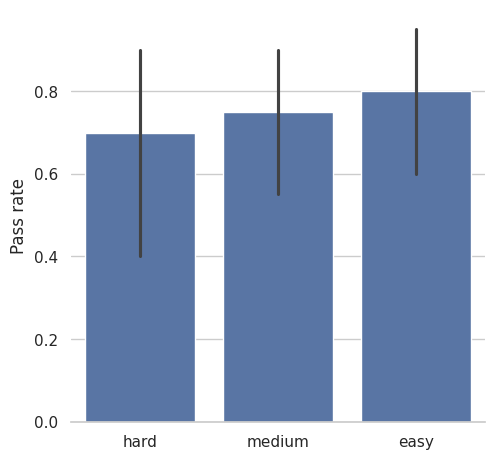

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=pass_dataset, kind="bar",
    x="difficulty", y="pass"
)
g.despine(left=True)
g.set_axis_labels("", "Pass rate")
g.legend.set_title("")
plt.savefig(os.path.join(result_path,"pass_rate_difficulty.png"), dpi=300, bbox_inches="tight")


## no subcategories

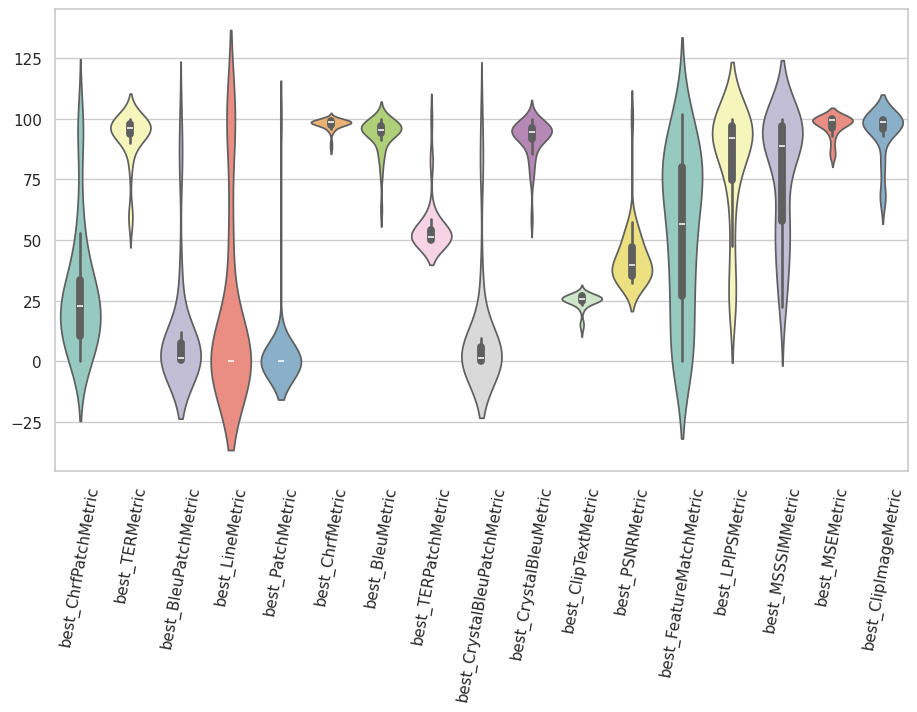

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))
plt.xticks(rotation=80)

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=filtered_df, palette="Set3")#,order=order)
plt.savefig(os.path.join(result_path,"violin_all_metrics.png"), dpi=300, bbox_inches="tight")


In [89]:
filtered_df[filtered_df.columns.difference(['difficulty','id'])].mean(axis=0)

best_BleuMetric                93.301835
best_BleuPatchMetric           10.946338
best_ChrfMetric                97.639793
best_ChrfPatchMetric           28.235933
best_ClipImageMetric           93.803153
best_ClipTextMetric            24.801141
best_CrystalBleuMetric         91.755994
best_CrystalBleuPatchMetric    10.382647
best_FeatureMatchMetric        53.080387
best_LPIPSMetric               81.430691
best_LineMetric                19.736842
best_MSEMetric                 96.943648
best_MSSSIMMetric              77.368687
best_PSNRMetric                42.548607
best_PatchMetric                2.631579
best_TERMetric                 92.229111
best_TERPatchMetric            55.204999
dtype: float64

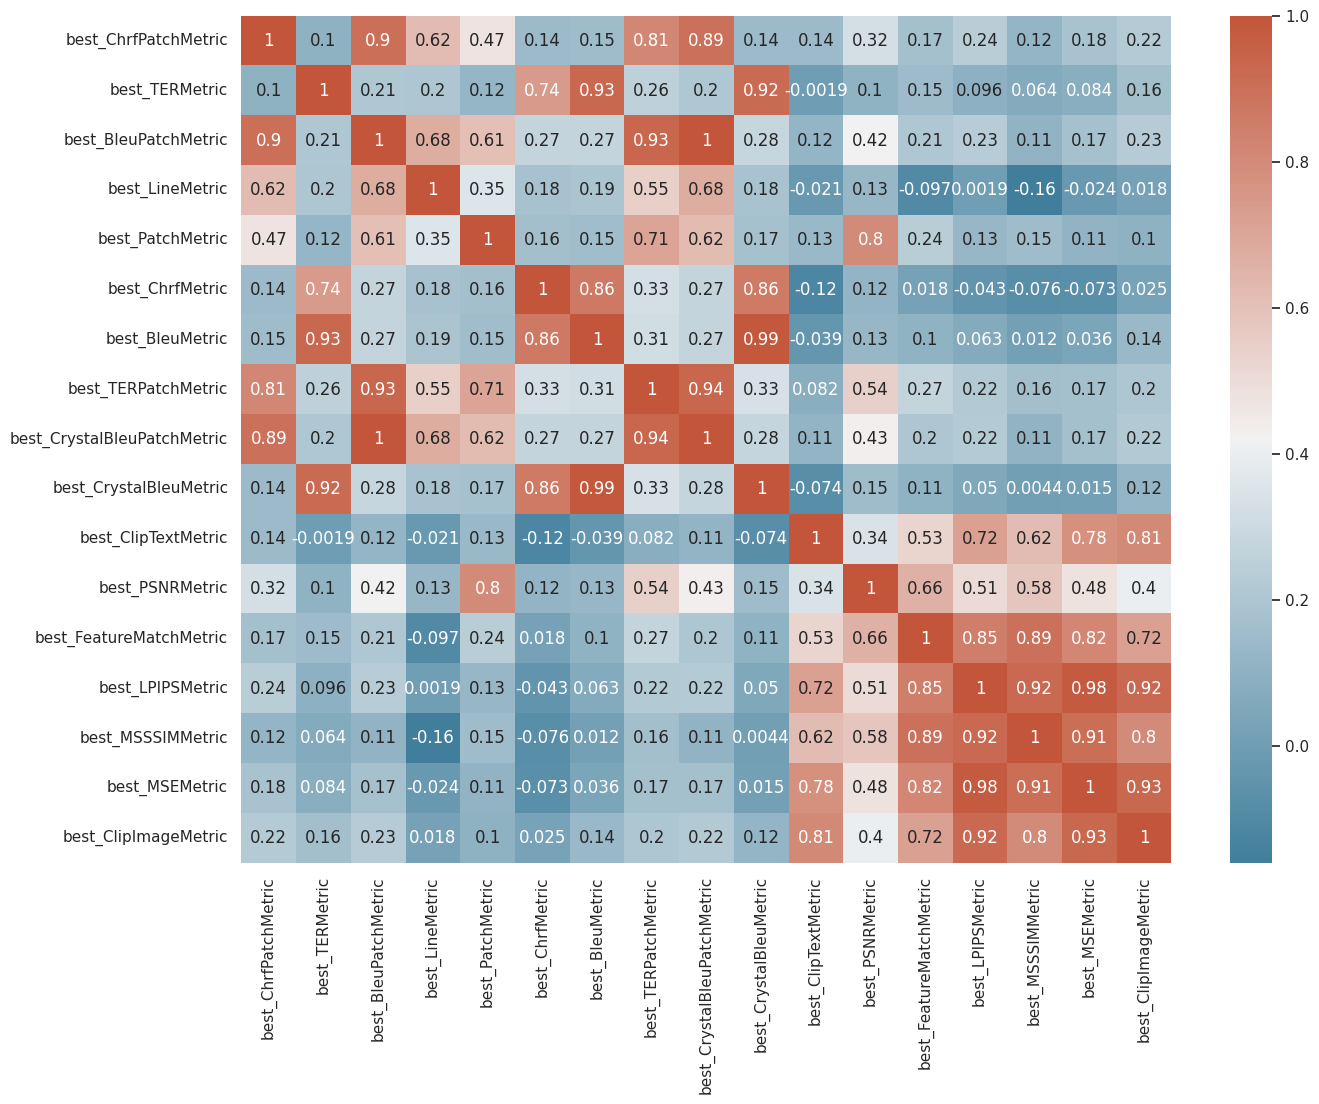

In [90]:
#TODO move that to metricbench and measure the correlation on the exploded dataset
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = filtered_df.select_dtypes(["int","float"]).corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  cmap=cmap, annot=True)
plt.savefig(os.path.join(result_path,"heatmap_correlation.png"), dpi=300, bbox_inches="tight")


## filtered by difficulty

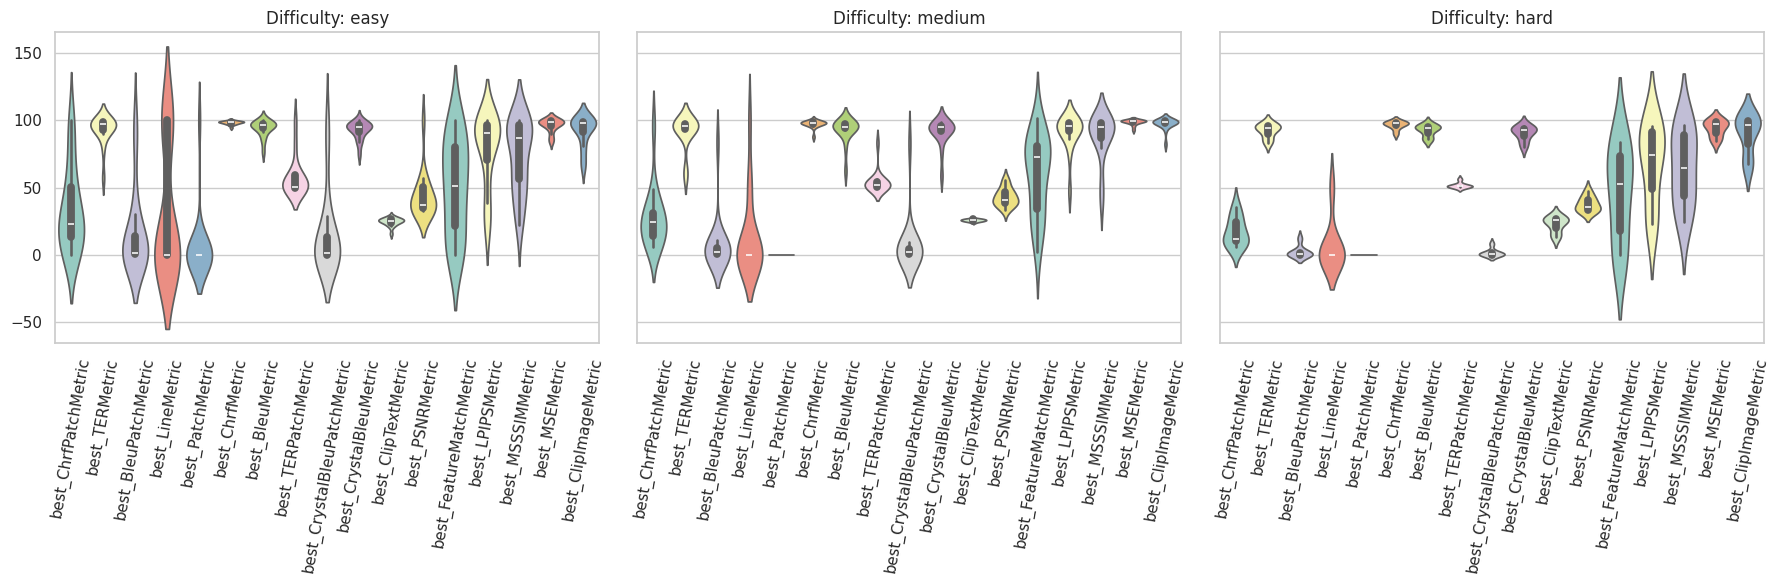

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

df_difficulty = filtered_df.drop("id",axis=1)
df_difficulty

sns.set_theme(style="whitegrid")

# Assuming 'difficulty' column exists in the DataFrame
difficulties = ['easy', 'medium', 'hard']
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # Create 3 subplots

for i, difficulty in enumerate(difficulties):
    sns.violinplot(
        data=df_difficulty[df_difficulty['difficulty'] == difficulty], 
        ax=axes[i], 
        palette="Set3"
    )
    axes[i].set_title(f'Difficulty: {difficulty}')
    axes[i].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.savefig(os.path.join(result_path,"violin_by_difficulty.png"), dpi=300, bbox_inches="tight")
plt.show()


In [92]:
df_difficulty['difficulty'] = pd.Categorical(df_difficulty['difficulty'], categories=['easy', 'medium', 'hard'], ordered=True)
averages = df_difficulty.groupby('difficulty',observed=True).mean()
averages.to_csv(os.path.join(result_path,"avg_by_difficulty.csv"))

averages

,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_ChrfMetric,best_BleuMetric,best_TERPatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_ClipTextMetric,best_PSNRMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_MSSSIMMetric,best_MSEMetric,best_ClipImageMetric
difficulty,,,,,,,,,,,,,,,,,
easy,33.569313,92.942115,17.059359,31.250000,6.25,98.363299,94.127318,57.510891,16.327490,92.760862,24.683708,44.046976,50.453600,78.546448,73.242194,96.374373,92.136757
medium,27.596029,91.387438,8.435240,13.333333,0.00,97.368069,92.750639,54.338099,8.081066,91.236883,25.815702,43.133876,59.304634,90.963030,87.763958,98.771100,97.443663
hard,17.416572,92.402973,2.354644,7.142857,0.00,96.568331,92.596148,51.792031,1.726394,90.571534,22.895497,37.869614,45.746801,67.596806,64.525089,94.328878,89.810966


In [93]:
med = df_difficulty.groupby('difficulty',observed=True).median()
med.to_csv(os.path.join(result_path,"med_by_difficulty.csv"))
med

,best_ChrfPatchMetric,best_TERMetric,best_BleuPatchMetric,best_LineMetric,best_PatchMetric,best_ChrfMetric,best_BleuMetric,best_TERPatchMetric,best_CrystalBleuPatchMetric,best_CrystalBleuMetric,best_ClipTextMetric,best_PSNRMetric,best_FeatureMatchMetric,best_LPIPSMetric,best_MSSSIMMetric,best_MSEMetric,best_ClipImageMetric
difficulty,,,,,,,,,,,,,,,,,
easy,22.763221,97.251385,1.437980,0.0,0.0,98.924931,96.555340,50.735294,1.191382,95.217197,25.245008,37.076649,51.237553,90.625034,86.731544,98.786140,98.043655
medium,24.432890,96.035240,2.437979,0.0,0.0,98.359146,95.136017,51.724136,1.962339,94.800278,25.876177,40.852016,72.815536,95.649559,95.139458,99.683182,98.947212
hard,11.659032,94.372292,0.420175,0.0,0.0,97.744179,94.675957,51.327435,0.365727,93.150131,25.723572,35.858707,52.631580,74.477783,64.370399,97.079002,96.719658
